In [ ]:
import numpy as np 
import pandas as pd 
import os
import re
import matplotlib.pyplot as plt
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU, LSTM, Bidirectional
from keras.layers.embeddings import Embedding
from keras.initializers import Constant
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [ ]:

data_1 = pd.read_json('/content/drive/MyDrive/Natural language processing dataset/sarcasm prediction/Sarcasm_Headlines_Dataset.json', lines=True)
data_2 = pd.read_json('/content/drive/MyDrive/Natural language processing dataset/sarcasm prediction/Sarcasm_Headlines_Dataset_v2.json', lines=True)
data =  pd.concat([data_1, data_2])
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


Data cleaning

In [ ]:
def clean_text(text):
    text = text.lower()
    
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text = pattern.sub('', text)
    text = " ".join(filter(lambda x:x[0]!='@', text.split()))
    emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    text = emoji.sub(r'', text)
    text = text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)        
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text) 
    text = re.sub(r"\'ll", " will", text)  
    text = re.sub(r"\'ve", " have", text)  
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"did't", "did not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"have't", "have not", text)
    text = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-]", "", text)
    return text

In [ ]:
data['headline']=data['headline'].apply(lambda x: clean_text(x))
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret bl...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the roseanne revival catches up to our thorny ...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear sons web series closest t...,1
3,https://politics.theonion.com/boehner-just-wan...,boehner just wants wife to listen not come up ...,1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,jk rowling wishes snape happy birthday in the ...,0


In [ ]:
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def CleanTokenize(text):
    

    #for line in data['headline']:
        
        # tokenize the text
        tokens = word_tokenize(text)
        # remove puntuations
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        # remove non alphabetic characters
        words = [word for word in stripped if word.isalpha()]
        stop_words = set(stopwords.words("english"))
        # remove stop words
        words = [w for w in words if not w in stop_words]
        
        return ' '.join(words)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
x='"I was depressed. He asked me to be happy. I am not depressed anymore."'
print(len(CleanTokenize(x)))

46


In [ ]:
data['headline']=data['headline'].apply(lambda x: CleanTokenize(x))

In [ ]:
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues secret black c...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,roseanne revival catches thorny political mood...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting fear sons web series closest thin...,1
3,https://politics.theonion.com/boehner-just-wan...,boehner wants wife listen come alternative deb...,1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,jk rowling wishes snape happy birthday magical...,0


Visualizing word cloud for the sarcasm statement

In [ ]:
def create_corpus_of_target(data,target):
    corpus=[]
    for x in data[data['is_sarcastic']==target].headline.str.split():
        for i in x:
            corpus.append(i)
    return corpus  



In [ ]:
from wordcloud import WordCloud
#corpus0=create_corpus_of_target(data,0)
corpus1=create_corpus_of_target(data,1)

word_cloud_corpus1=WordCloud(background_color='white',max_font_size=80,width = 1000, height = 500).generate(' '.join(corpus1[:100]))

Text(0.5, 1.0, 'WORDCLOUD FOR SARCASTIC DATA')

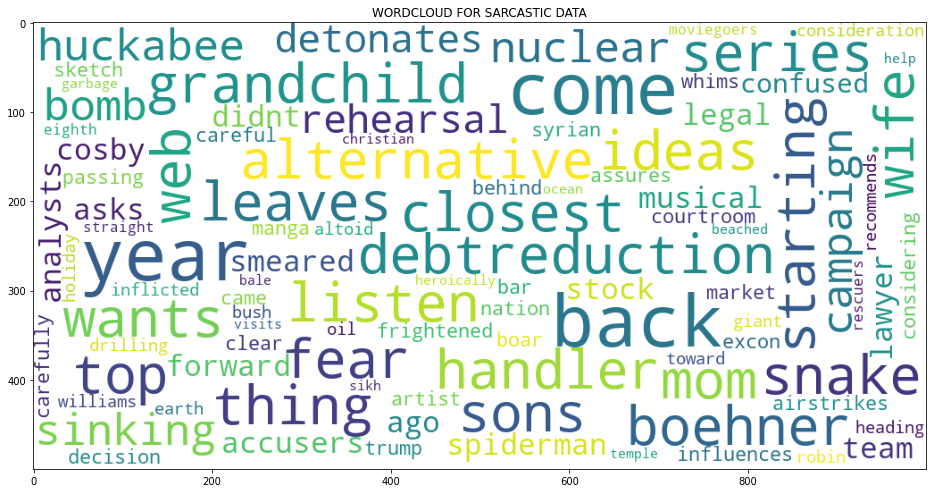

In [ ]:
plt.figure(figsize=(16,16))
plt.imshow(word_cloud_corpus1)
plt.title('WORDCLOUD FOR SARCASTIC DATA')

In [ ]:
data.shape

(55328, 3)

In [ ]:
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues secret black c...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,roseanne revival catches thorny political mood...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting fear sons web series closest thin...,1
3,https://politics.theonion.com/boehner-just-wan...,boehner wants wife listen come alternative deb...,1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,jk rowling wishes snape happy birthday magical...,0


Now converting into vectors and the train_test_split

In [ ]:
def tokenizer(x):
    """
    Tokenize x
    :param x: List of sentences/strings to be tokenized
    :return: Tuple of (tokenized x data, tokenizer used to tokenize x)
    """
    # TODO: Implement
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(x)
    return tokenizer.texts_to_sequences(x), tokenizer


# Tokenize Example output
text_sentences = [
    'The quick brown fox jumps over the lazy dog .',
    'By Jove , my quick study of lexicography won a prize .',
    'This is a short sentence .']
y=tokenizer(text_sentences)  
text_tokenized, text_tokenizer = tokenizer(text_sentences)
print(text_tokenizer.word_index) 
print(text_tokenized)
#print(text_tokenizer)
print(text_tokenized[0])
print(text_sentences)

{'the': 1, 'quick': 2, 'a': 3, 'brown': 4, 'fox': 5, 'jumps': 6, 'over': 7, 'lazy': 8, 'dog': 9, 'by': 10, 'jove': 11, 'my': 12, 'study': 13, 'of': 14, 'lexicography': 15, 'won': 16, 'prize': 17, 'this': 18, 'is': 19, 'short': 20, 'sentence': 21}
[[1, 2, 4, 5, 6, 7, 1, 8, 9], [10, 11, 12, 2, 13, 14, 15, 16, 3, 17], [18, 19, 3, 20, 21]]
[1, 2, 4, 5, 6, 7, 1, 8, 9]
['The quick brown fox jumps over the lazy dog .', 'By Jove , my quick study of lexicography won a prize .', 'This is a short sentence .']


In [ ]:
for sample_i, (sent, token_sent) in enumerate(zip(text_sentences, text_tokenized)):
    print('Sequence {} in x'.format(sample_i + 1))
    print('  Input:  {}'.format(sent))
    print('  Output: {}'.format(token_sent)) 

Sequence 1 in x
  Input:  The quick brown fox jumps over the lazy dog .
  Output: [1, 2, 4, 5, 6, 7, 1, 8, 9]
Sequence 2 in x
  Input:  By Jove , my quick study of lexicography won a prize .
  Output: [10, 11, 12, 2, 13, 14, 15, 16, 3, 17]
Sequence 3 in x
  Input:  This is a short sentence .
  Output: [18, 19, 3, 20, 21]


In [ ]:
input_tokenized, input_tokenizer = tokenizer(data['headline'])
print(input_tokenized[0])

[202, 15004, 626, 3428, 2215, 254, 35, 2029, 2477, 8461]


In [ ]:
input_tokenized,input_tokenizer=tokenizer(data['headline'])
print(input_tokenizer.word_index)
print(len(input_tokenizer.word_index))

{'new': 1, 'trump': 2, 'man': 3, 'us': 4, 'report': 5, 'one': 6, 'area': 7, 'woman': 8, 'donald': 9, 'says': 10, 'day': 11, 'time': 12, 'like': 13, 'first': 14, 'get': 15, 'trumps': 16, 'people': 17, 'house': 18, 'obama': 19, 'life': 20, 'still': 21, 'make': 22, 'white': 23, 'women': 24, 'back': 25, 'could': 26, 'would': 27, 'clinton': 28, 'years': 29, 'world': 30, 'family': 31, 'americans': 32, 'way': 33, 'study': 34, 'black': 35, 'gop': 36, 'bill': 37, 'really': 38, 'police': 39, 'best': 40, 'american': 41, 'school': 42, 'know': 43, 'finds': 44, 'watch': 45, 'show': 46, 'nation': 47, 'good': 48, 'president': 49, 'going': 50, 'home': 51, 'things': 52, 'death': 53, 'video': 54, 'say': 55, 'last': 56, 'state': 57, 'love': 58, 'big': 59, 'year': 60, 'every': 61, 'health': 62, 'parents': 63, 'campaign': 64, 'mom': 65, 'may': 66, 'hillary': 67, 'kids': 68, 'getting': 69, 'need': 70, 'gets': 71, 'party': 72, 'work': 73, 'little': 74, 'right': 75, 'take': 76, 'change': 77, 'dead': 78, 'makes

In [ ]:
def pad(x, length=None):
    """
    Pad x
    :param x: List of sequences.
    :param length: Length to pad the sequence to.  If None, use length of longest sequence in x.
    :return: Padded numpy array of sequences
    """
    # TODO: Implement
    return pad_sequences(x, maxlen=length, padding='post')



# Pad Tokenized output
test_pad = pad(text_tokenized) 
for sample_i, (token_sent, pad_sent) in enumerate(zip(text_tokenized, test_pad)):
    print('Sequence {} in x'.format(sample_i + 1))
    print('  Input:  {}'.format(np.array(token_sent)))
    print('  Output: {}'.format(pad_sent))

Sequence 1 in x
  Input:  [1 2 4 5 6 7 1 8 9]
  Output: [1 2 4 5 6 7 1 8 9 0]
Sequence 2 in x
  Input:  [10 11 12  2 13 14 15 16  3 17]
  Output: [10 11 12  2 13 14 15 16  3 17]
Sequence 3 in x
  Input:  [18 19  3 20 21]
  Output: [18 19  3 20 21  0  0  0  0  0]


In [ ]:
data_for_trained2=pad(input_tokenized,30)
data_for_trained2[0]

array([  202, 15004,   626,  3428,  2215,   254,    35,  2029,  2477,
        8461,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0], dtype=int32)

Word Embedding by keras 

In [ ]:
validation_split=0.2
num_validation_samples = int(validation_split * data_for_trained2.shape[0])

X_train_pad = data_for_trained2[:-num_validation_samples]
y_train = data['is_sarcastic'][:-num_validation_samples]
X_test_pad =data_for_trained2[-num_validation_samples:]
y_test = data['is_sarcastic'][-num_validation_samples:]

print('Shape of X_train_pad:', X_train_pad.shape)
print('Shape of y_train:', y_train.shape)

print('Shape of X_test_pad:', X_test_pad.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train_pad: (44263, 30)
Shape of y_train: (44263,)
Shape of X_test_pad: (11065, 30)
Shape of y_test: (11065,)


In [ ]:
Embedding_dimension=20
embedding_layer = Embedding(len(input_tokenizer.word_index) + 1,
                            Embedding_dimension,
                           
                            input_length=30)

In [ ]:

model = Sequential()
model.add(embedding_layer)
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

print('Summary of the built model...')
print(model.summary())

Summary of the built model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 20)            573160    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                21760     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 594,985
Trainable params: 594,985
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train_pad, y_train, batch_size=32, epochs=10, validation_data=(X_test_pad, y_test), verbose=2)

Epoch 1/10
1384/1384 - 154s - loss: 0.4239 - acc: 0.7980 - val_loss: 0.2772 - val_acc: 0.8950
Epoch 2/10
1384/1384 - 154s - loss: 0.2008 - acc: 0.9267 - val_loss: 0.2137 - val_acc: 0.9263
Epoch 3/10
1384/1384 - 154s - loss: 0.1315 - acc: 0.9548 - val_loss: 0.1476 - val_acc: 0.9515
Epoch 4/10
1384/1384 - 157s - loss: 0.0938 - acc: 0.9691 - val_loss: 0.1270 - val_acc: 0.9604
Epoch 5/10
1384/1384 - 154s - loss: 0.0751 - acc: 0.9758 - val_loss: 0.1163 - val_acc: 0.9657
Epoch 6/10
1384/1384 - 153s - loss: 0.0628 - acc: 0.9795 - val_loss: 0.1091 - val_acc: 0.9684
Epoch 7/10
1384/1384 - 156s - loss: 0.0514 - acc: 0.9838 - val_loss: 0.1023 - val_acc: 0.9731
Epoch 8/10
1384/1384 - 158s - loss: 0.0434 - acc: 0.9864 - val_loss: 0.0881 - val_acc: 0.9777
Epoch 9/10
1384/1384 - 158s - loss: 0.0354 - acc: 0.9898 - val_loss: 0.0910 - val_acc: 0.9779
Epoch 10/10
1384/1384 - 154s - loss: 0.0306 - acc: 0.9915 - val_loss: 0.0998 - val_acc: 0.9790


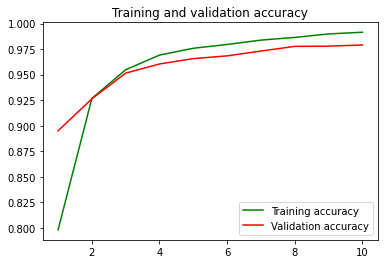

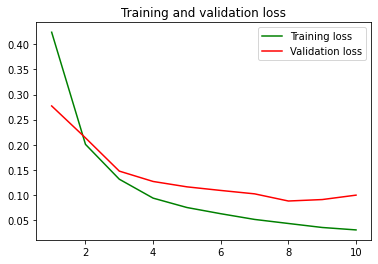

In [ ]:
# Plot results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Prediction

In [ ]:
def predict_sarcasm(s):
  #  x_final = pd.DataFrame({"headline":[s]})
    #test_lines=clean_text(x_final)
    test_lines1 = CleanTokenize(s)
    text_tokenized, text_tokenizer = tokenizer(text_sentences)
    
    test_review_pad = pad(text_tokenized, 30)
    print(test_review_pad.shape)
    pred = model.predict(test_review_pad)
    
    print(pred[0][0])
    if pred[0][0]>=0.5: return "It's a sarcasm!" 
   
    else: return "It's not a sarcasm."

In [ ]:
predict_sarcasm("I was depressed. He asked me to be happy. I am not depressed anymore.")

(3, 30)
0.999617


"It's a sarcasm!"

In [ ]:
predict_sarcasm("You just broke my car window. Great job.")

(3, 30)
0.999617


"It's a sarcasm!"

In [ ]:
predict_sarcasm("You just saved my dog's life. Thanks a million.")

(3, 30)
0.999617


"It's a sarcasm!"

In [ ]:
predict_sarcasm("I want a million dollars!")

(3, 30)
0.999617


"It's a sarcasm!"

In [ ]:

predict_sarcasm("I just won a million dollars!")

(3, 30)
0.999617


"It's a sarcasm!"

In [ ]:
predict_sarcasm('hey i am so lucky')

(3, 30)
0.999617


"It's a sarcasm!"